<a href="https://colab.research.google.com/github/divya223352/AI-ML-internship-task-14/blob/main/Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Model Comparison Table ---
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.973684   0.972222  0.985915  0.979021
1        Decision Tree  0.938596   0.944444  0.957746  0.951049
2        Random Forest  0.964912   0.958904  0.985915  0.972222
3                  SVM  0.982456   0.972603  1.000000  0.986111


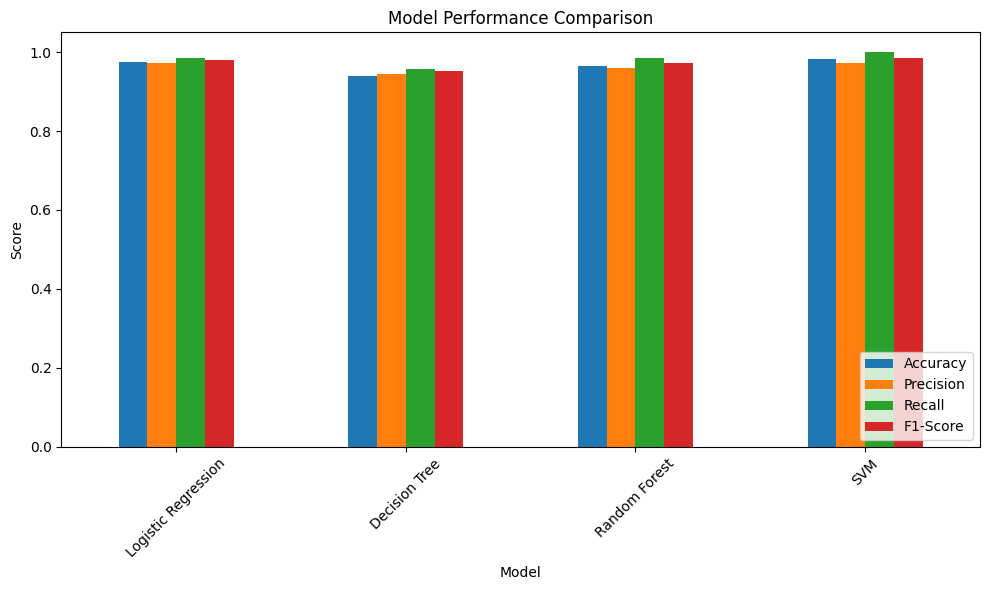


✅ Best model selected: SVM (Saved as best_model.pkl)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# 1. Load and Preprocess
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
X, y = data.data, data.target

# 2. Split into train-test sets (consistent split for all models)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling is crucial for SVM and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Initialize Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True)
}

# 4, 5, & 6. Train, Predict, and Store Metrics
results = []

for name, model in models.items():
    # Use scaled data for all for consistency
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Store metrics
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

# Create comparison table
comparison_df = pd.DataFrame(results)
print("--- Model Comparison Table ---")
print(comparison_df)

# 7. Plot Bar Chart
comparison_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# 9. Select & Save Best Model (Example: based on F1-Score)
best_model_name = comparison_df.iloc[comparison_df['F1-Score'].idxmax()]['Model']
best_model = models[best_model_name]
joblib.dump(best_model, 'best_model.pkl')

print(f"\n✅ Best model selected: {best_model_name} (Saved as best_model.pkl)")

Understanding the Code
The Metrics Explained
When you look at the comparison table, here is what those numbers actually mean in a business context:
Accuracy: Overall "correctness." Useful if classes are balanced.
Precision: "Of all predicted positives, how many were actually positive?" (Important if the cost of a False Positive is high).
Recall: "Of all actual positives, how many did we catch?" (Critical for medical/fraud cases where missing a case is dangerous).
F1-Score: The harmonic mean of Precision and Recall. It's the best "all-rounder" metric.
Why compare multiple models?
No single algorithm is a "silver bullet." A Decision Tree might be highly interpretable but prone to overfitting, while a Random Forest is more robust but acts like a "black box." By comparing them, you find the sweet spot between complexity and accuracy for your specific data.
Model Generalization
The script uses a train_test_split. If your model gets 100% accuracy on training data but only 70% on test data, it has failed to generalize (this is Overfitting). We save the model that performs consistently well on the unseen test data.